# Resources

- [Blog post](https://medium.com/@AmyGrabNGoInfo/5-ways-for-deciding-number-of-clusters-in-a-clustering-model-5db993ea5e09) for this tutorial
- Video version of the tutorial on [YouTube](https://www.youtube.com/watch?v=DDrSPPwvGtQ&list=PLVppujud2yJoLN1xHi8pBkrA-BPkWvUMr&index=4)
- More video tutorials on [unsupervised model](https://www.youtube.com/playlist?list=PLVppujud2yJoLN1xHi8pBkrA-BPkWvUMr)
- More blog posts on [unsupervised model](https://medium.com/@AmyGrabNGoInfo/list/unsupervised-model-1b518a1f1176)

For more information about data science and machine learning, please check out my [YouTube channel](https://www.youtube.com/channel/UCmbA7XB6Wb7bLwJw9ARPcYg), [Medium Page](https://medium.com/@AmyGrabNGoInfo) and [GrabNGoInfo.com](https://grabngoinfo.com/tutorials/).

# Intro

Welcome to GrabNGoInfo! Deciding the optimal number of clusters is a critical step in building an unsupervised clustering model. In this tutorial, we will talk about five ways to decide the number of clusters for a clustering model in Python. You will learn:
* How to use the elbow method on within cluster sum of squares to decide the number of clusters?
* How to use the Silhouette score to decide the number of clusters?
* How to use the hierarchical graph to find the optimal number of clusters visually?
* How to use AIC and BIC for choosing the number of clusters?
* How to use gap statistics to decide the number of clusters?

Let's get started!

# Step 1: Import Libraries

In the first step, we will import the Python libraries.
* `pandas` and `numpy` are for data processing.
* `matplotlib` and `seaborn` are for visualization.
* `datasets` from the `sklearn` library contains some toy datasets. We will use the iris dataset to illustrate the different ways of deciding the number of clusters.
* `PCA` is for dimensionality reduction.
* `KMeans`, `hierachy`, and `GaussianMixture` are three widely used clustering models.
* `silhouette_score` is a metric to evaluate clustering model performance.

In [ ]:
# Data processing 
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from sklearn import datasets

# Dimensionality reduction
from sklearn.decomposition import PCA

# Modeling
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hier
from sklearn.mixture import GaussianMixture

# Number of clusters
from sklearn.metrics import silhouette_score

# Step 2: Read Data

Step 2 reads the data. we first load the data using `load_iris()`, which is in a Python dictionary format. The keys of the dictionary show that the iris dataset includes the data, target, frame, target names, description of the dataset, feature names, filename, and data module.

In [ ]:
# Load data
iris = datasets.load_iris()

# Show data information
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Next, let's print out the `feature_names`, `target_names`, and `target`. We can see that there are four features, Sepal length, sepal width, petal length, and petal width. The target contains the names of three different flowers, setosa, versicolor, and virginica, which are encoded into three numbers, 0, 1, and 2.

In [ ]:
# Print feature and target information
print('The feature names are:', iris['feature_names'])
print('The target names are:', iris['target_names'])
print('The target values are:', iris['target'])

The feature names are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The target names are: ['setosa' 'versicolor' 'virginica']
The target values are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In order to use the data for the clustering model, we need to convert the data into a dataframe format. Using `.info()`, we can see that the dataset has 150 records, and there are no missing values.

In [ ]:
# Put features data into a dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target to the dataframe 
df['target'] = iris.target

# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Using `value_counts()`, we can see that there are 50 records for each type of flower.

In [ ]:
# Check counts of each category
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

Clustering model is a type of unsupervised model, so we will not use the target information for the model. Only the four features will be utilized in the model and the goal is to group the same type of flowers together, therefore, a new dataframe called X is created, which includes only the four features.

In [ ]:
# Remove target for the clustering model
X = df[df.columns.difference(['target'])]

# Step 3: Dimensionality Reduction and Visualization

In step 3, we will visualize the data to understand the ground truth clusters. 

Since there are four features, we need to use a dimensionality reduction technique to convert the features from a 4-dimensional space to a 2-dimensional space for visualization.

Principle Component Analysis (PCA) is applied and the three types of flowers are visualized in the scatter plot. We can see that among the three types of flowers, one type is quite different from the other two flowers, but the other two flowers are quite similar to each other.

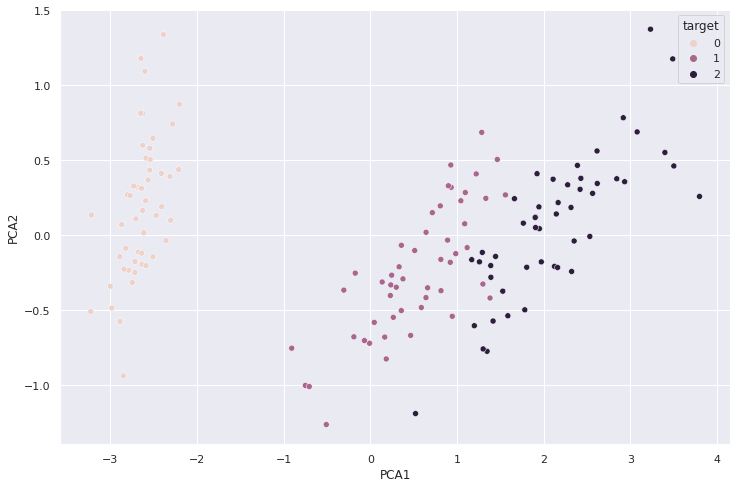

In [ ]:
# Fit PCA with 2 components
pca = PCA(n_components=2).fit_transform(X)

# Add the two components as columns in the dataframe
df['PCA1'] = pca[:, 0]
df['PCA2'] = pca[:, 1]

# Visualize the data
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="target")

We know the ground truth for the number of clusters is three, but two can be a reasonable number as well because of the similarity of the two types of flowers.

Note that in a real-world project, there is usually no ground truth label available for the clustering model. We pick a dataset with labels for this tutorial mainly to evaluate different ways of deciding the number of clusters.

# Step 4: Deciding Number of Clusters Using Elbow Method (Method 1)

In step 4, we will show how to use an elbow method to decide the number of optimal clusters.

The elbow method is the most widely used method for choosing the number of clusters. It runs clustering models for a range of cluster numbers and plots the within cluster sum of squares. The elbow on the plot shows the point where the diminishing returns for additional clusters happen.

In [ ]:
# Create an empty dictionary to save the within cluster sum of square values
wcss = {} 
# Look through the number of clusters
for i in range(1,11):
  # Run kmeans model
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  #Sum of squared distances of samples to their closest cluster center.
  wcss[i] = (kmeans.inertia_)
  # Print the within cluster sum of squares for each cluster number
  print(f'The within cluster sum of squares for {i} clusters is {wcss[i]:.2f}') 

The within cluster sum of squares for 1 clusters is 681.37
The within cluster sum of squares for 2 clusters is 152.35
The within cluster sum of squares for 3 clusters is 78.85
The within cluster sum of squares for 4 clusters is 57.23
The within cluster sum of squares for 5 clusters is 46.47
The within cluster sum of squares for 6 clusters is 39.04
The within cluster sum of squares for 7 clusters is 34.30
The within cluster sum of squares for 8 clusters is 30.06
The within cluster sum of squares for 9 clusters is 28.27
The within cluster sum of squares for 10 clusters is 26.09


From the visualization, we can see that the biggest decrease in within cluster sum of squares happens at 2 clusters, and there is a relatively large decrease from 2 to 3 clusters. The decreases are small for the models with the number of clusters greater than 3. Therefore, we can conclude that the optimal number of clusters is probably 2 or 3.

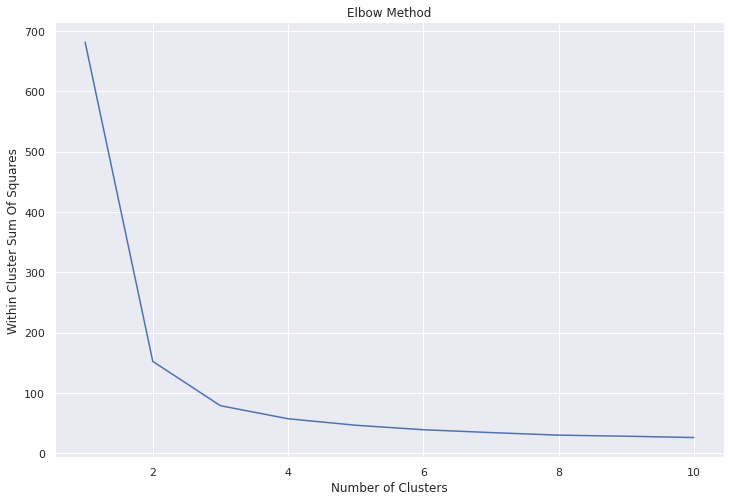

In [ ]:
# Visualization
plt.figure(figsize=(12,8))
plt.plot(list(wcss.keys()),list(wcss.values()))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum Of Squares')
plt.show()

# Step 5: Deciding Number of Clusters Using Silhouette Score (Method 2)

In step 5, we will talk about how to use the Silhouette score to decide the number of clusters.

The silhouette score measures how similar a data point is to its own cluster compared to the closest neighbor cluster. The silhouette ranges from −1 to +1. 
* The best value is 1, and a value close to 1 means that the sample's distance to the nearest neighbor cluster is much larger than the intra-cluster distance.
* 0 indicate overlapping clusters[2].
* The worst value is -1, and a value close to -1 means that the sample is assigned to the wrong cluster[2].

Note that Silhouette Coefficient is only defined if the number of clusters is at least 2 and at most the number of samples minus 1. 

The Silhouette score of the model is the average Silhouette value of all samples.

In [ ]:
# Create an empty dictionary for the Silhouette score
s_score = {} 
# Loop through the number of clusters
for i in range(2,11): # Note that the minimum number of clusters is 2
  # Fit kmeans clustering model for each cluster number
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  # Make prediction
  classes = kmeans.predict(X)
  # Calculate Silhouette score
  s_score[i] = (silhouette_score(X, classes)) 
  # Print the Silhouette score for each cluster number
  print(f'The silhouette score for {i} clusters is {s_score[i]:.3f}') 

The silhouette score for 2 clusters is 0.681
The silhouette score for 3 clusters is 0.553
The silhouette score for 4 clusters is 0.498
The silhouette score for 5 clusters is 0.493
The silhouette score for 6 clusters is 0.365
The silhouette score for 7 clusters is 0.357
The silhouette score for 8 clusters is 0.362
The silhouette score for 9 clusters is 0.349
The silhouette score for 10 clusters is 0.331


From the visualization, we can see that the model with 2 clusters has the highest value of Silhouette score, and the model with 3 clusters has the 2nd highest value, so we get the consistent result that there are 2 or 3 clusters.

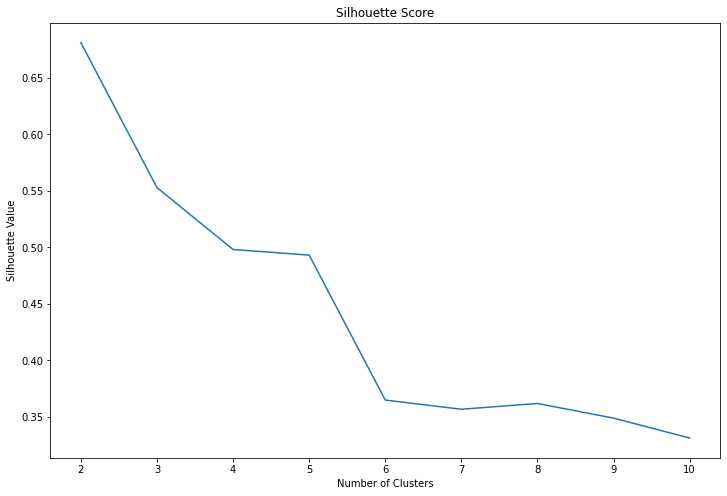

In [ ]:
# Visualization
plt.figure(figsize=(12,8))
plt.plot(list(s_score.keys()),list(s_score.values()))
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.show()

# Step 6: Deciding Number of Clusters Using Hierarchical Graph (Method 3)

In step 6, we will use the hierarchical graph to find the number of clusters.

The y axis is the euclidean distance, so the longer the vertical line is, the larger distance between the clusters.

From the graph, we can see that the two clusters connected by the blue line have the largest distance, and the two sub-clusters in red have a relatively large distance too. Therefore, the hierarchical graph suggests 2 or 3 clusters as well.

Text(0, 0.5, 'Euclidean Distance')

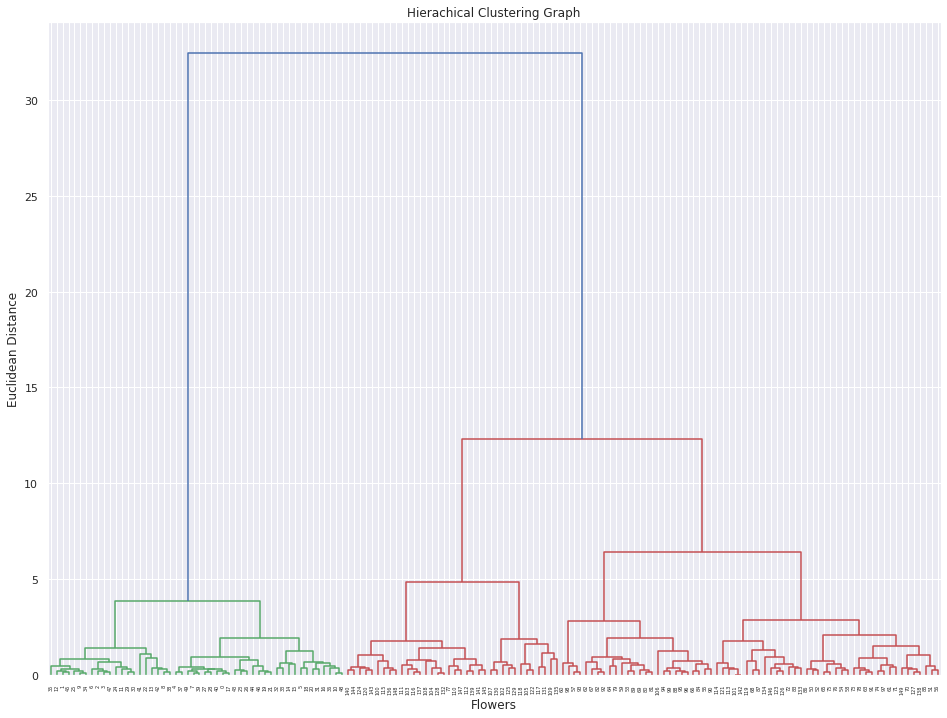

In [ ]:
# Change figure size
plt.figure(figsize=(16,12))

# Fit the heirachical graph
heirachical_graph=hier.dendrogram(hier.linkage(X, method='ward')) #method='ward' uses the Ward variance minimization algorithm

# Add titles and labels
plt.title('Hierachical Clustering Graph')
plt.xlabel('Flowers')
plt.ylabel('Euclidean Distance')

# Step 7: Deciding Number of Clusters Using AIC and BIC from GMM (Method 4)

In step 7, we will talk about how to decide the number of clusters using AIC and BIC values.

Both AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are metrics that measure the relative prediction errors of different models. The lower the value is, the better the model is.

The Gaussian Mixture Model AIC and BIC scores can help us decide the optimal number of clusters.

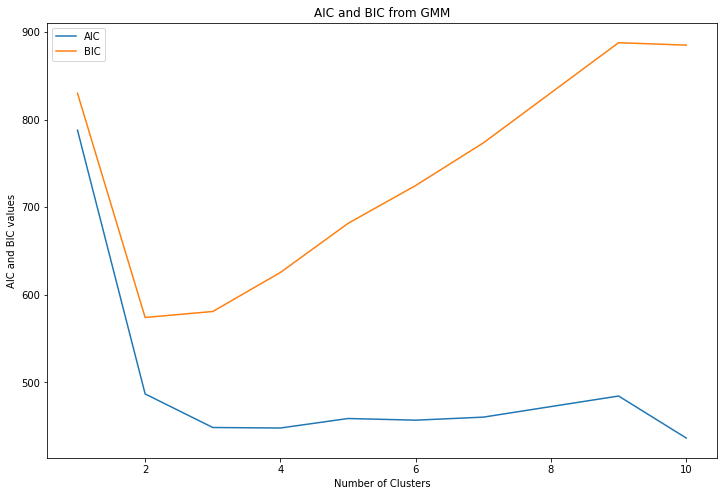

In [ ]:
# Create empty dictionary for AIC and BIC values
aic_score = {} 
bic_score = {}

# Loop through different number of clusters
for i in range(1,11): 
  # Create Gaussian Mixture Model
  gmm = GaussianMixture(n_components=i, random_state=0).fit(X)
  # Get AIC score for the model
  aic_score[i] = gmm.aic(X)
  # Get BIC score for the model
  bic_score[i] = gmm.bic(X)

# Visualization
plt.figure(figsize=(12,8))
plt.plot(list(aic_score.keys()),list(aic_score.values()), label='AIC')
plt.plot(list(bic_score.keys()),list(bic_score.values()), label='BIC')
plt.legend(loc='best')
plt.title('AIC and BIC from GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC and BIC values')
plt.show()

From the visualization, we can see that AIC has the smallest value at 3 clusters. Although the AIC value for 10 clusters is smaller, the difference between 3 clusters and 10 clusters is quite small. In this case, we will choose a simpler model with 3 clusters.

BIC has the smallest value at the 2-cluster model, and the 3-cluster model has a similar value, suggesting that the optimal number of clusters is 2 or 3.

# Step 8: Deciding Number of Clusters Using Gap Statistics (Method 5)

In step 8, we will talk about how to decide the optimal number of clusters using gap statistics. Gap statistics compares the change in within-cluster dispersion with the uniform distribution[3]. A large gap statistics value means that the clustering is very different from the uniform distribution.

Anaconda.org has a notebook with the implementation of gap statistics[1]. The code in the gap statistics section are all borrowed from the [notebook](https://anaconda.org/milesgranger/gap-statistic/notebook). 

In [ ]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

The function output the optimal number of cluster based on the number of clusters with the largest gap value, but we can see from the visualization that after 3 clusters, the graph is relatively flat, showing a diminishing gap increase. Therefore, the optimal number of clusters is 3 if we use the elbow method.

In [ ]:
# Automatically output the number of clusters
k, gapdf = optimalK(X, nrefs=3, maxClusters=11)
print('Optimal k is: ', k)

Optimal k is:  8


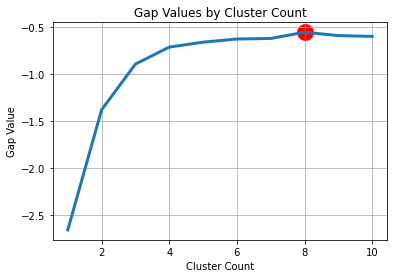

In [ ]:
# Visualization
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

# Step 9: Which method to use for the optimal number of clusters?

Now we have learned the 5 different ways of choosing the number of clusters, you might wonder how to choose a method for your project. Here is a general guideline:

* Start with the elbow method for the within cluster sum of squares and see if there is a clear elbow.
* If the elbow is not very clear, use the hierarchical graph to help decide the optimal number.
* If the optimal number of clusters is still not obvious after using the elbow method and hierarchical graph, use all five methods and choose the optimal number of clusters the majority of methods suggest.

# Put All Code Together

In [ ]:
#-----------------------------------------------
# Step 1: Import Libraries
#-----------------------------------------------

# Data processing 
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from sklearn import datasets

# Dimensionality reduction
from sklearn.decomposition import PCA

# Modeling
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hier
from sklearn.mixture import GaussianMixture

# Number of clusters
from sklearn.metrics import silhouette_score

#-----------------------------------------------
# Step 2: Read Data
#-----------------------------------------------

# Load data
iris = datasets.load_iris()

# Show data information
iris.keys()

# Print feature and target information
print('The feature names are:', iris['feature_names'])
print('The target names are:', iris['target_names'])
print('The target values are:', iris['target'])

# Put features data into a dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target to the dataframe 
df['target'] = iris.target

# Data information
df.info()

# Check counts of each category
df['target'].value_counts()

# Remove target for the clustering model
X = df[df.columns.difference(['target'])]

#-----------------------------------------------
# Step 3: Dimensionality Reduction and Visualization
#-----------------------------------------------

# Fit PCA with 2 components
pca = PCA(n_components=2).fit_transform(X)

# Add the two components as columns in the dataframe
df['PCA1'] = pca[:, 0]
df['PCA2'] = pca[:, 1]

# Visualize the data
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="target")

#-----------------------------------------------
# Step 4: Step 4: Deciding Number of Clusters Using Elbow Method (Method 1)
#-----------------------------------------------

# Create an empty dictionary to save the within cluster sum of square values
wcss = {} 
# Look through the number of clusters
for i in range(1,11):
  # Run kmeans model
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  #Sum of squared distances of samples to their closest cluster center.
  wcss[i] = (kmeans.inertia_)
  # Print the within cluster sum of squares for each cluster number
  print(f'The within cluster sum of squares for {i} clusters is {wcss[i]:.2f}') 

# Visualization
plt.figure(figsize=(12,8))
plt.plot(list(wcss.keys()),list(wcss.values()))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum Of Squares')
plt.show()

#-----------------------------------------------
# Step 5: Deciding Number of Clusters Using Silhouette Score (Method 2)
#-----------------------------------------------

# Create an empty dictionary for the Silhouette score
s_score = {} 
# Loop through the number of clusters
for i in range(2,11): # Note that the minimum number of clusters is 2
  # Fit kmeans clustering model for each cluster number
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  # Make prediction
  classes = kmeans.predict(X)
  # Calculate Silhouette score
  s_score[i] = (silhouette_score(X, classes)) 
  # Print the Silhouette score for each cluster number
  print(f'The silhouette score for {i} clusters is {s_score[i]:.3f}') 

# Visualization
plt.figure(figsize=(12,8))
plt.plot(list(s_score.keys()),list(s_score.values()))
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.show()

#-----------------------------------------------
# Step 6: Deciding Number of Clusters Using Heirachical Graph (Method 3)
#-----------------------------------------------

# Change figure size
plt.figure(figsize=(16,12))

# Fit the heirachical graph
heirachical_graph=hier.dendrogram(hier.linkage(X, method='ward')) #method='ward' uses the Ward variance minimization algorithm

# Add titles and labels
plt.title('Hierachical Clustering Graph')
plt.xlabel('Flowers')
plt.ylabel('Euclidean Distance')

#-----------------------------------------------
# Step 7: Deciding Number of Clusters Using AIC and BIC from GMM (Method 4)
#-----------------------------------------------

# Create empty dictionary for AIC and BIC values
aic_score = {} 
bic_score = {}

# Loop through different number of clusters
for i in range(1,11): 
  # Create Gaussian Mixture Model
  gmm = GaussianMixture(n_components=i, random_state=0).fit(X)
  # Get AIC score for the model
  aic_score[i] = gmm.aic(X)
  # Get BIC score for the model
  bic_score[i] = gmm.bic(X)

# Visualization
plt.figure(figsize=(12,8))
plt.plot(list(aic_score.keys()),list(aic_score.values()), label='AIC')
plt.plot(list(bic_score.keys()),list(bic_score.values()), label='BIC')
plt.legend(loc='best')
plt.title('AIC and BIC from GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC and BIC values')
plt.show()

#-----------------------------------------------
# Step 8: Deciding Number of Clusters Using Gap Statistics (Method 5)
#-----------------------------------------------

def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

# Automatically output the number of clusters
k, gapdf = optimalK(X, nrefs=3, maxClusters=11)
print('Optimal k is: ', k)

# Visualization
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()



# Summary

In this tutorial, we talked about five ways to decide the number of clusters for a clustering model in Python. You learned:
* How to use the elbow method on within cluster sum of squares to decide the number of clusters?
* How to use the Silhouette score to decide the number of clusters?
* How to use the hierarchical graph to find the optimal number of clusters visually?
* How to use AIC and BIC for choosing the number of clusters?
* How to use gap statistics to decide the number of clusters?

# Recommended Tutorials

- [GrabNGoInfo Machine Learning Tutorials Inventory](https://medium.com/grabngoinfo/grabngoinfo-machine-learning-tutorials-inventory-9b9d78ebdd67)
- [Hierarchical Topic Model for Airbnb Reviews](https://medium.com/p/hierarchical-topic-model-for-airbnb-reviews-f772eaa30434)
- [3 Ways for Multiple Time Series Forecasting Using Prophet in Python](https://medium.com/p/3-ways-for-multiple-time-series-forecasting-using-prophet-in-python-7a0709a117f9)
- [Time Series Anomaly Detection Using Prophet in Python](https://medium.com/grabngoinfo/time-series-anomaly-detection-using-prophet-in-python-877d2b7b14b4)
- [Time Series Causal Impact Analysis in Python](https://medium.com/grabngoinfo/time-series-causal-impact-analysis-in-python-63eacb1df5cc)
- [Hyperparameter Tuning For XGBoost](https://medium.com/p/hyperparameter-tuning-for-xgboost-91449869c57e)
- [Four Oversampling And Under-Sampling Methods For Imbalanced Classification Using Python](https://medium.com/p/four-oversampling-and-under-sampling-methods-for-imbalanced-classification-using-python-7304aedf9037)
- [Five Ways To Create Tables In Databricks](https://medium.com/grabngoinfo/five-ways-to-create-tables-in-databricks-cd3847cfc3aa)
- [Explainable S-Learner Uplift Model Using Python Package CausalML](https://medium.com/grabngoinfo/explainable-s-learner-uplift-model-using-python-package-causalml-a3c2bed3497c)
- [One-Class SVM For Anomaly Detection](https://medium.com/p/one-class-svm-for-anomaly-detection-6c97fdd6d8af)
- [Recommendation System: Item-Based Collaborative Filtering](https://medium.com/grabngoinfo/recommendation-system-item-based-collaborative-filtering-f5078504996a)
- [Hyperparameter Tuning for Time Series Causal Impact Analysis in Python](https://medium.com/grabngoinfo/hyperparameter-tuning-for-time-series-causal-impact-analysis-in-python-c8f7246c4d22)
- [Hyperparameter Tuning and Regularization for Time Series Model Using Prophet in Python](https://medium.com/grabngoinfo/hyperparameter-tuning-and-regularization-for-time-series-model-using-prophet-in-python-9791370a07dc)
- [Multivariate Time Series Forecasting with Seasonality and Holiday Effect Using Prophet in Python](https://medium.com/p/multivariate-time-series-forecasting-with-seasonality-and-holiday-effect-using-prophet-in-python-d5d4150eeb57)
- [LASSO (L1) Vs Ridge (L2) Vs Elastic Net Regularization For Classification Model](https://medium.com/towards-artificial-intelligence/lasso-l1-vs-ridge-l2-vs-elastic-net-regularization-for-classification-model-409c3d86f6e9)
- [S Learner Uplift Model for Individual Treatment Effect and Customer Segmentation in Python](https://medium.com/grabngoinfo/s-learner-uplift-model-for-individual-treatment-effect-and-customer-segmentation-in-python-9d410746e122)
- [How to Use R with Google Colab Notebook](https://medium.com/p/how-to-use-r-with-google-colab-notebook-610c3a2f0eab)

# References

[1] [Python implementation of the Gap Statistic](https://anaconda.org/milesgranger/gap-statistic/notebook)

[2] [sklearn silhouette score documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#)

[3] [Gap Statistics paper](https://hastie.su.domains/Papers/gap.pdf)